In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chromConvert = {
               'chr_x': 0, 
               'chr_x_p22_cnv': 1
               }

In [3]:
chromConvert_reverse = {
                0: 'chr_x', 
                1: 'chr_x_p22_cnv', 
               }

In [4]:
label = ['chr_x', 'chr_x_p22_cnv']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
for iterationNumber in range(7):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [7]:
y_predict_all[0].shape

(33, 2)

In [8]:
y_predict_all

[array([[9.9999988e-01, 1.3994888e-08],
        [9.9998367e-01, 3.1125467e-06],
        [9.9908626e-01, 3.6653923e-04],
        [9.9975628e-01, 4.6440597e-05],
        [9.9865556e-01, 1.7986774e-04],
        [1.0000000e+00, 6.2767215e-14],
        [9.9999821e-01, 9.3481070e-08],
        [9.9999857e-01, 6.7887420e-08],
        [1.0000000e+00, 6.2570081e-11],
        [1.0000000e+00, 6.0360067e-19],
        [1.0000000e+00, 1.8501716e-11],
        [1.0000000e+00, 6.4932612e-24],
        [1.0000000e+00, 6.8014586e-15],
        [9.9999964e-01, 4.9860827e-09],
        [1.0000000e+00, 1.1396076e-11],
        [9.9999928e-01, 5.3418347e-08],
        [1.0000000e+00, 1.7477708e-13],
        [9.9999988e-01, 1.0177735e-09],
        [1.0000000e+00, 5.1726790e-11],
        [1.0000000e+00, 2.4154589e-15],
        [1.0000000e+00, 1.8634132e-15],
        [1.0000000e+00, 6.1783384e-10],
        [9.9805498e-01, 2.9963630e-04],
        [9.9994624e-01, 1.8030753e-06],
        [9.9999928e-01, 1.9221163e-08],


In [9]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [10]:
for i in range(7):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [11]:
y_predict_all[0].shape

(33, 2)

In [12]:
label_convert

['chr_x', 'chr_x_p22_cnv']

In [13]:
len(y_test_concatenate_list)

225

In [14]:
len(y_predict_filtered_concatenate_list)

225

In [15]:
len(y_predict_concatenate_list)

225

# Classification Report

## Accuracy

In [16]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.9066666666666666


## Precision, Recall, and F1

In [17]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, 
                                          target_names=label_convert)


print(performanceReport)

               precision    recall  f1-score   support

        chr_x       0.94      0.95      0.94       189
chr_x_p22_cnv       0.71      0.69      0.70        36

    micro avg       0.91      0.91      0.91       225
    macro avg       0.83      0.82      0.82       225
 weighted avg       0.91      0.91      0.91       225



## Confusion Matrix

In [18]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN.csv')
confusion

,chr_x,chr_x_p22_cnv
chr_x,179,10
chr_x_p22_cnv,11,25


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [19]:
subtotal = [0] * 2  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [20]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [21]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_x,chr_x_p22_cnv
chr_x,0.947090,0.052910
chr_x_p22_cnv,0.305556,0.694444


### 3.10.6 Precision (查准率）

In [22]:
subtotal_predict = [0] * 2 
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [23]:
cm_p = []
for i in range(2):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [24]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_x,chr_x_p22_cnv
chr_x,0.942105,0.057895
chr_x_p22_cnv,0.285714,0.714286


#### Heat Map: Number

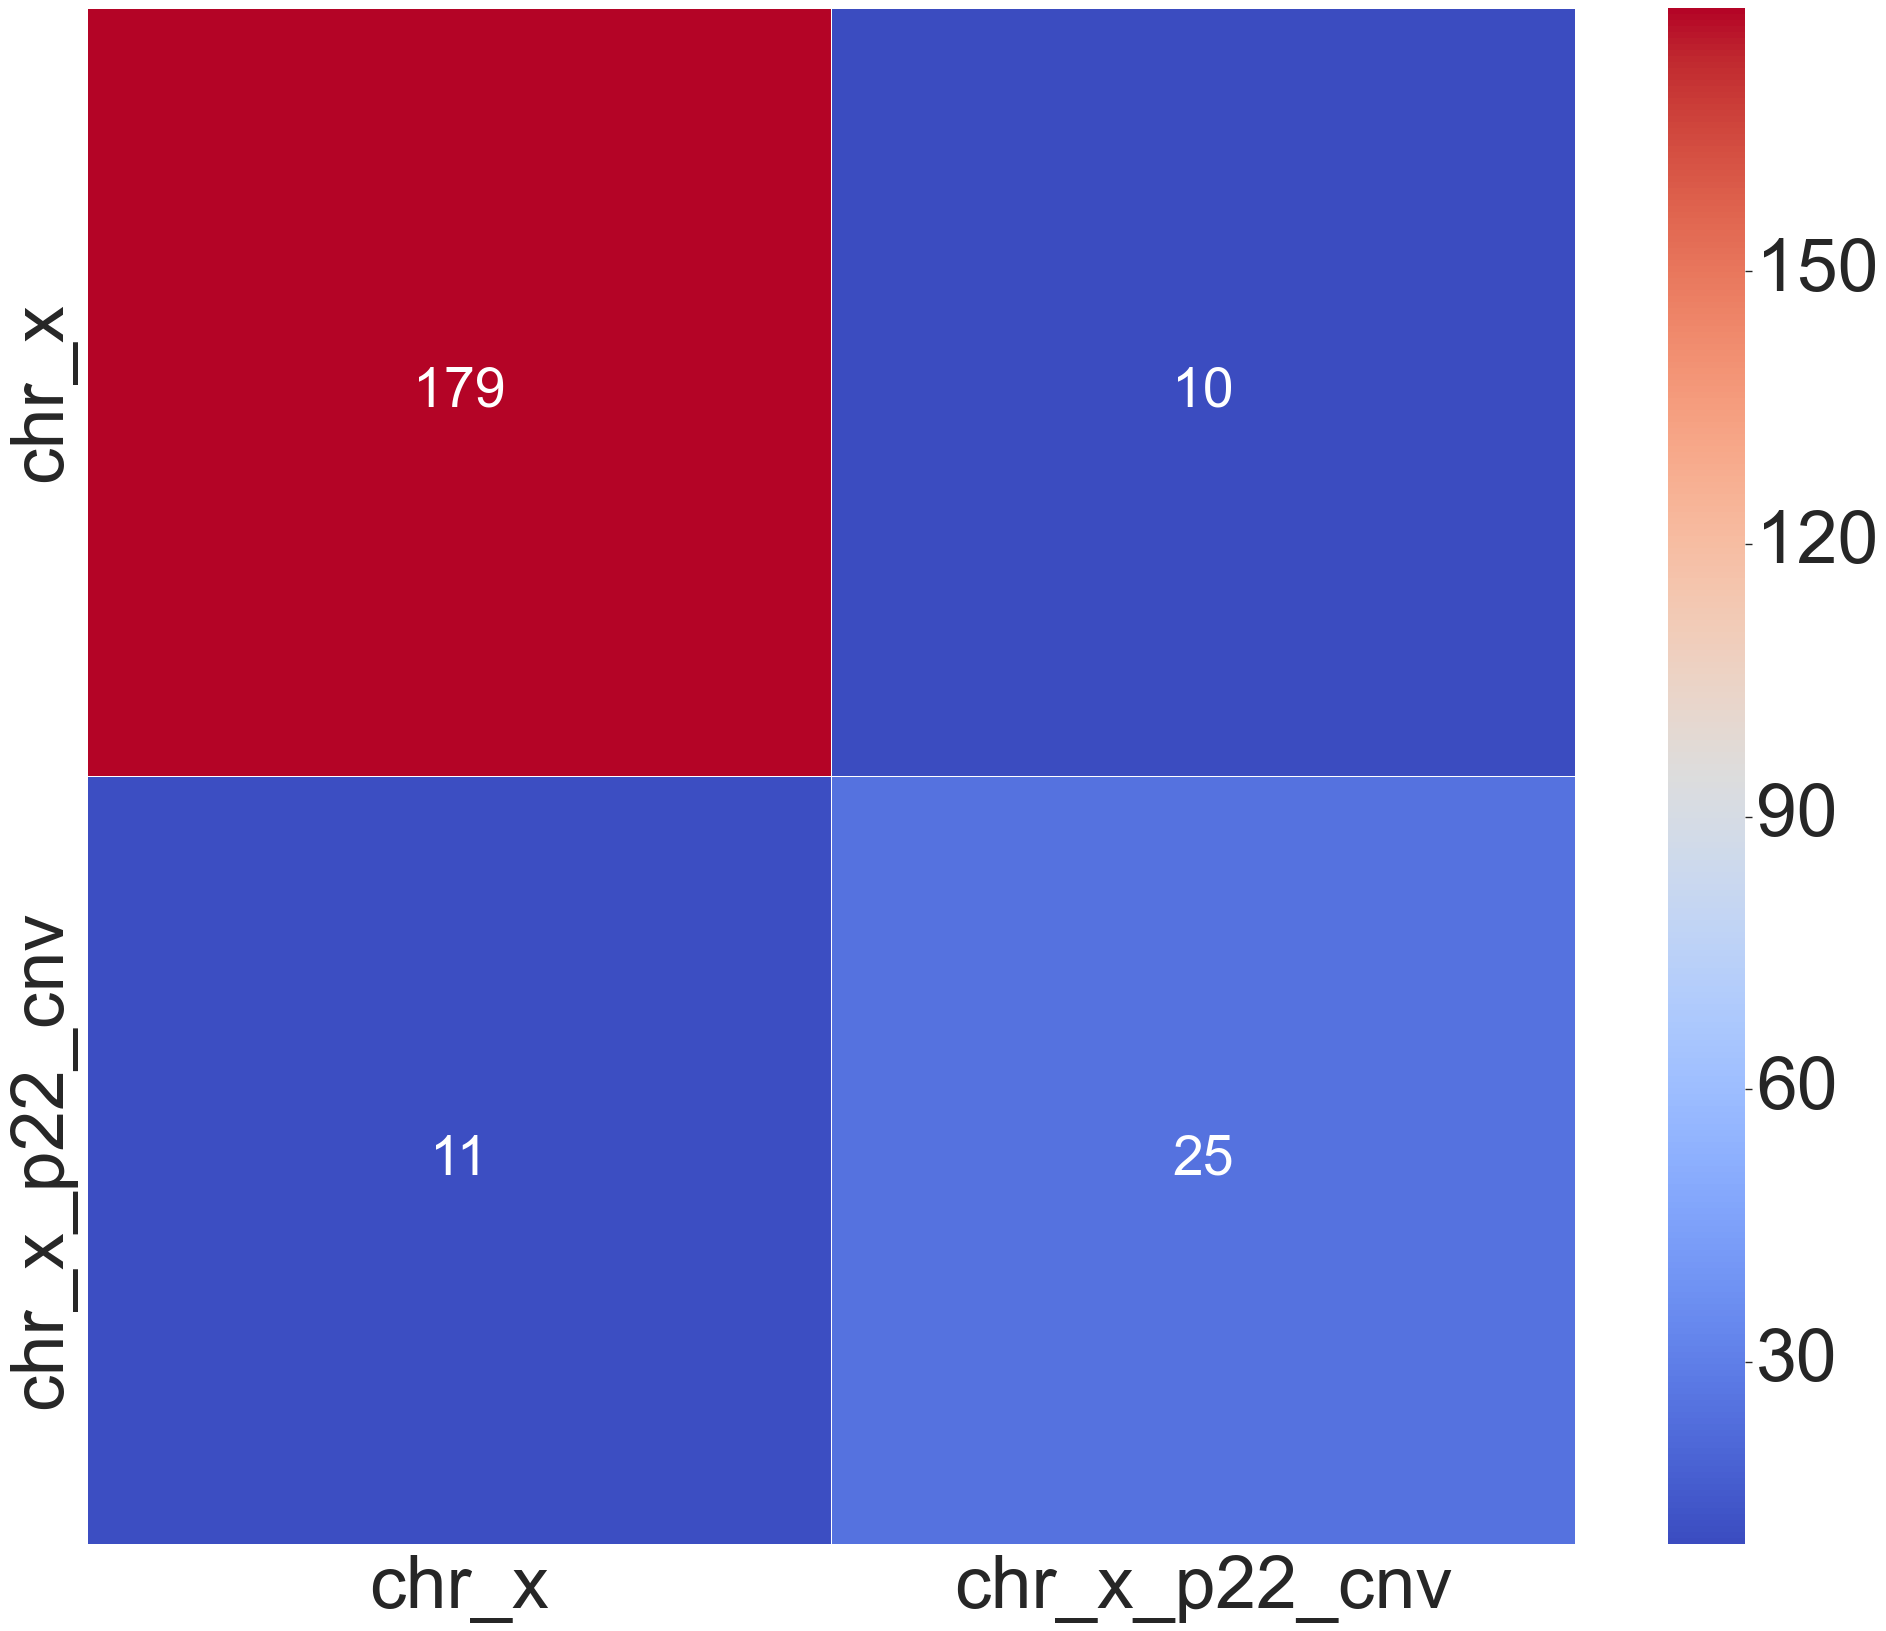

In [48]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, fmt='g',  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 50})
sb.set(font_scale = 5)

#### Heat Map of Recall: Rate (important!!!)

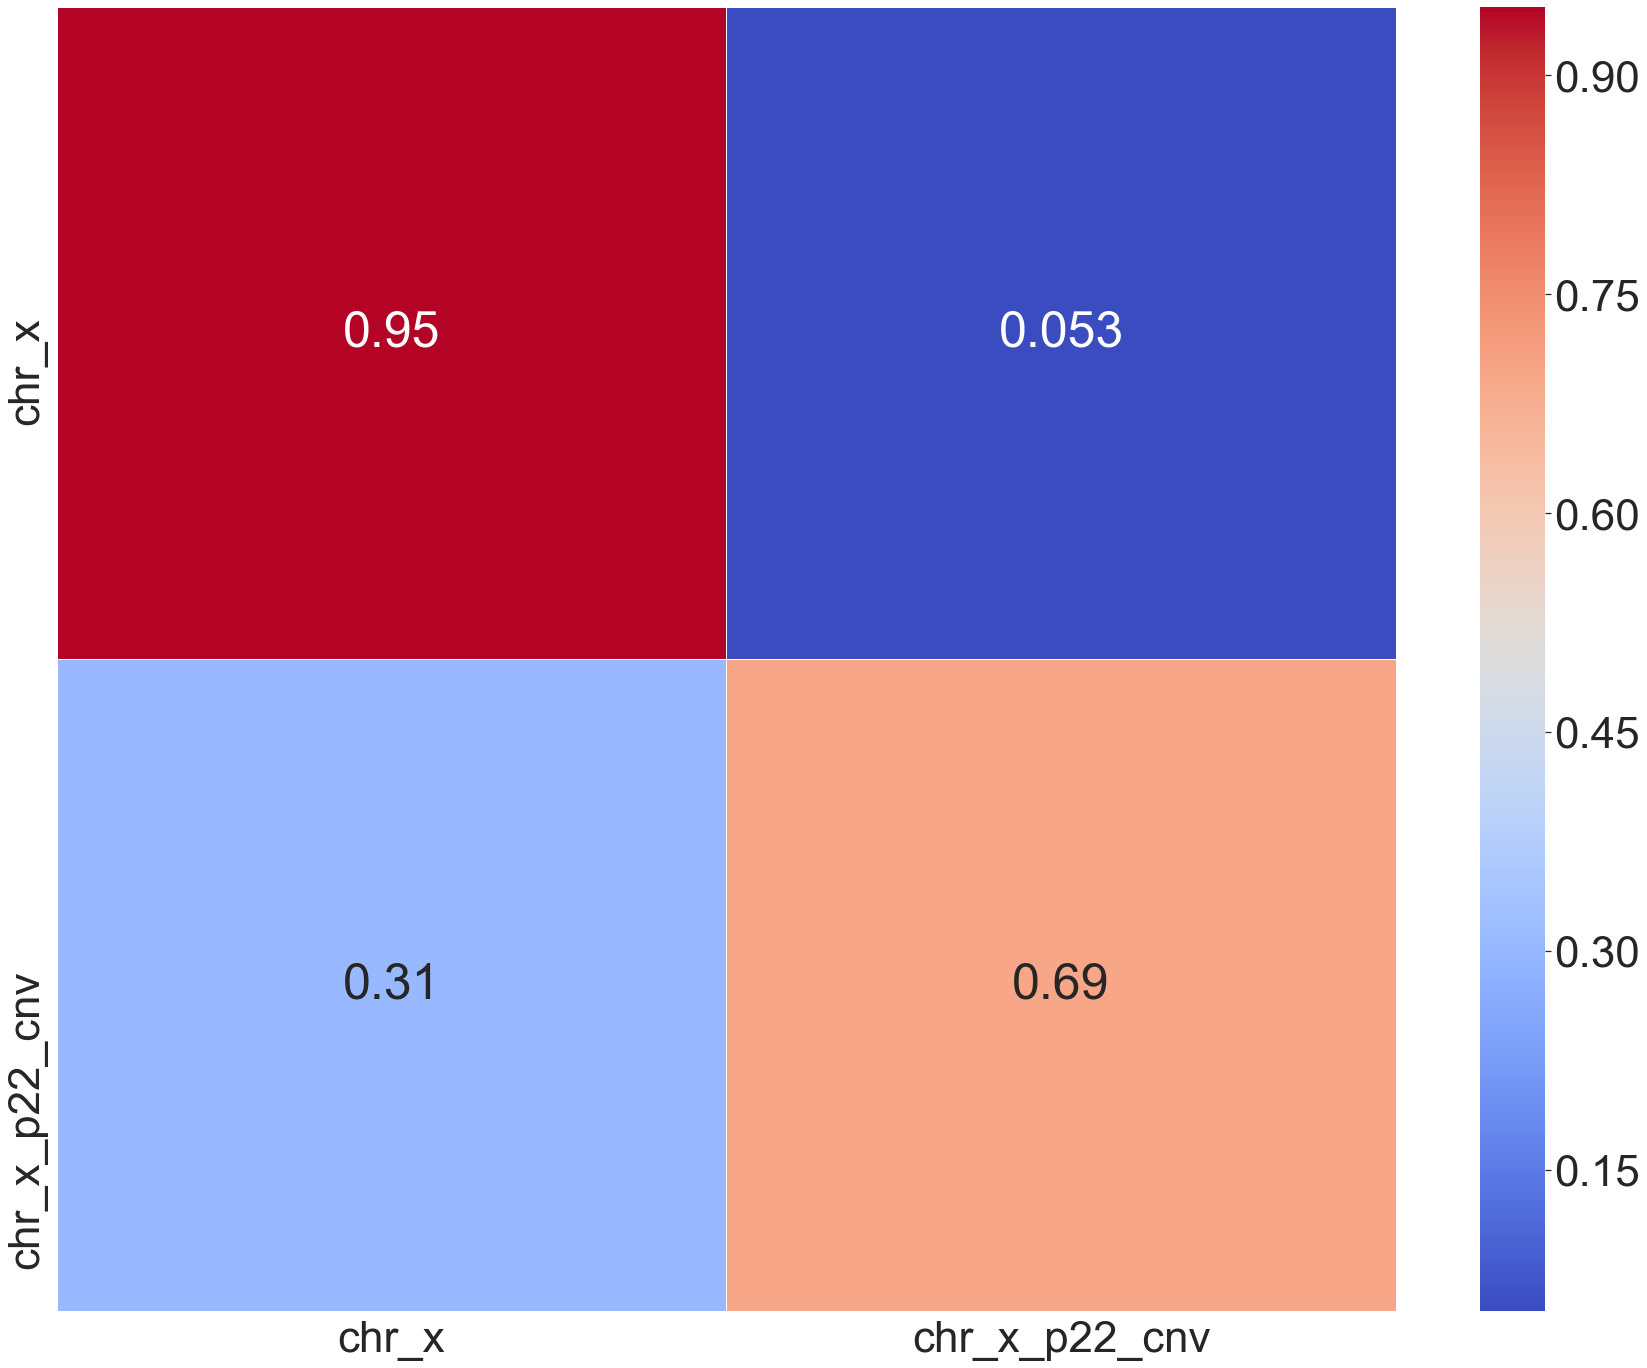

In [26]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

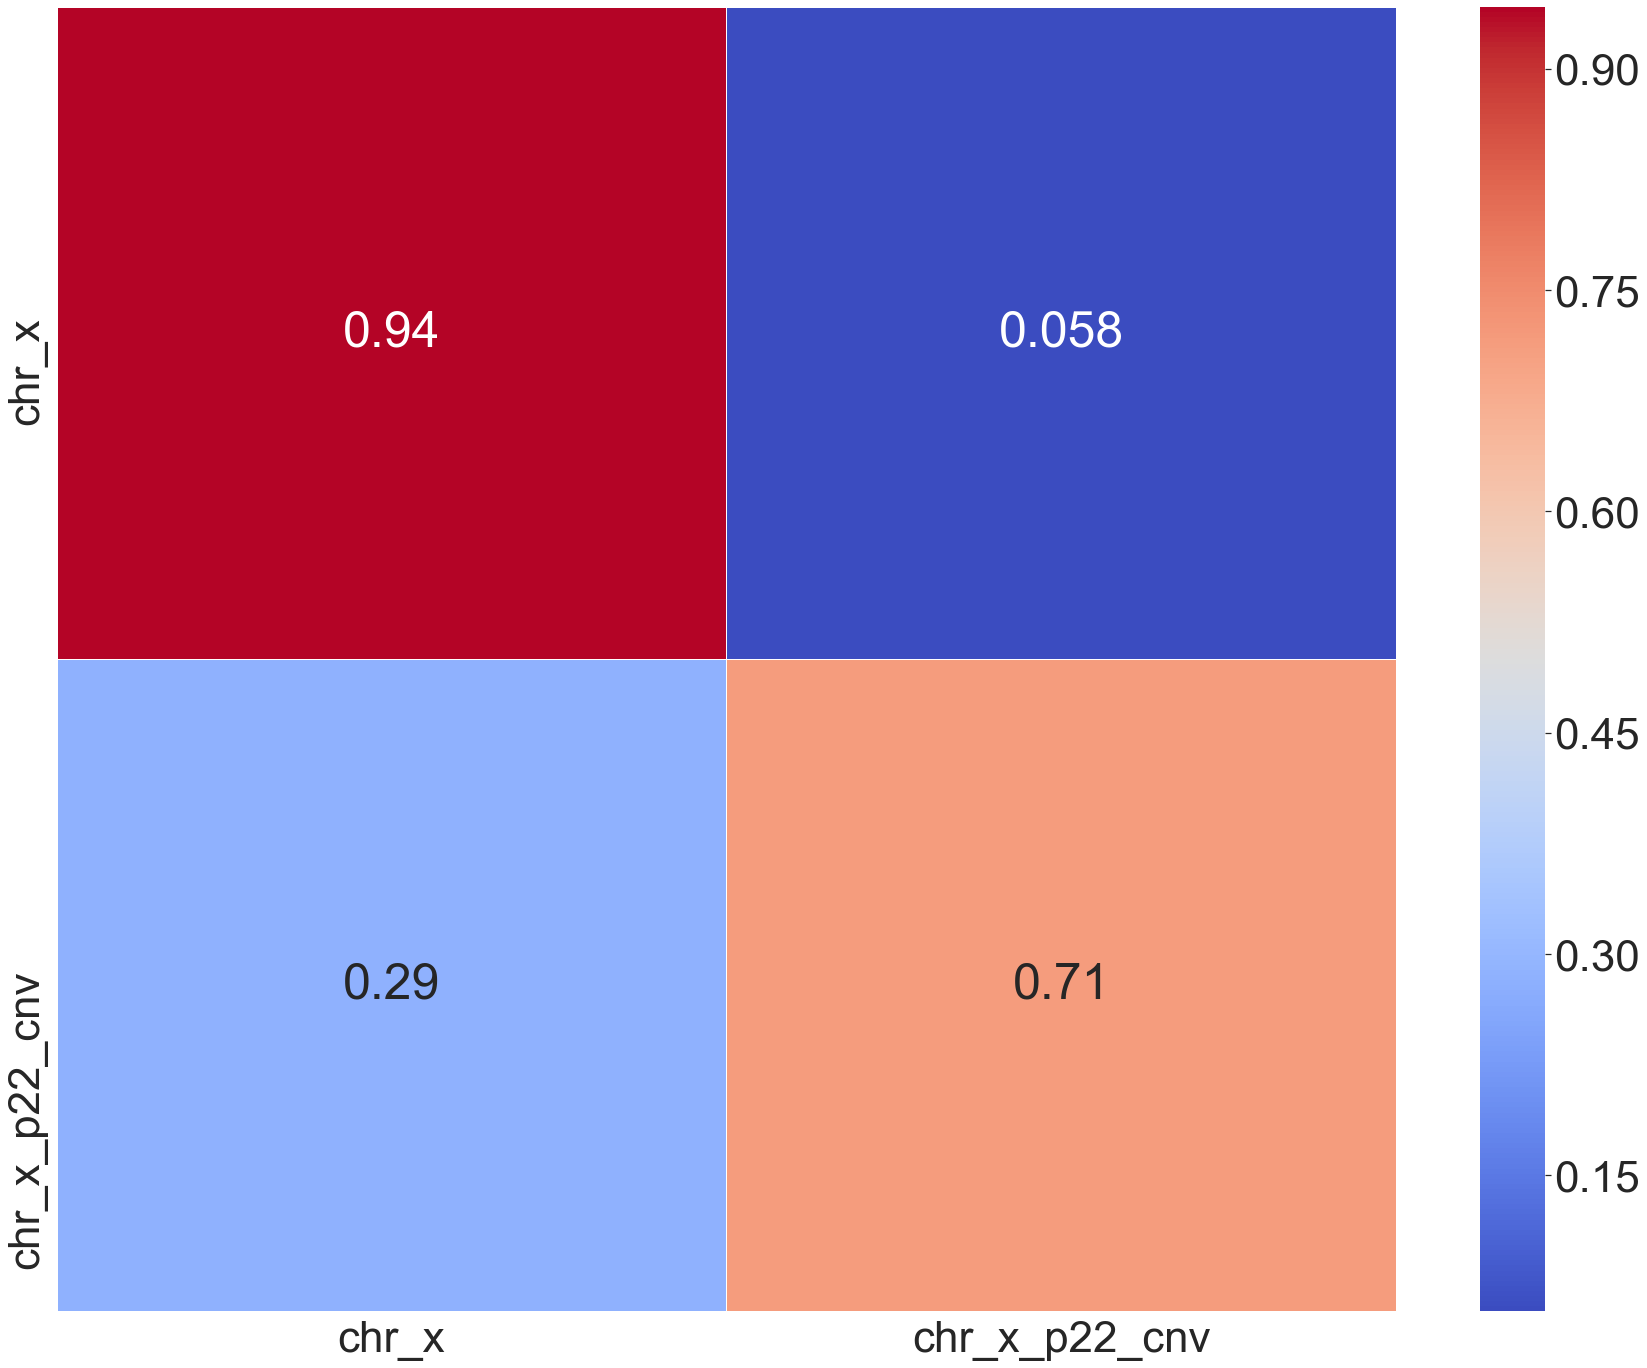

In [27]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

In [49]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [50]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [51]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

# ROC Curve

In [31]:
y_predict_concatenate_array = np.array(y_predict_concatenate_list)
y_predict_concatenate_array

array([[9.99999881e-01, 1.39948879e-08],
       [9.99983668e-01, 3.11254666e-06],
       [9.99086261e-01, 3.66539229e-04],
       [9.99756277e-01, 4.64405966e-05],
       [9.98655558e-01, 1.79867740e-04],
       [1.00000000e+00, 6.27672149e-14],
       [9.99998212e-01, 9.34810700e-08],
       [9.99998569e-01, 6.78874201e-08],
       [1.00000000e+00, 6.25700811e-11],
       [1.00000000e+00, 6.03600672e-19],
       [1.00000000e+00, 1.85017158e-11],
       [1.00000000e+00, 6.49326123e-24],
       [1.00000000e+00, 6.80145857e-15],
       [9.99999642e-01, 4.98608266e-09],
       [1.00000000e+00, 1.13960759e-11],
       [9.99999285e-01, 5.34183471e-08],
       [1.00000000e+00, 1.74777076e-13],
       [9.99999881e-01, 1.01777353e-09],
       [1.00000000e+00, 5.17267895e-11],
       [1.00000000e+00, 2.41545887e-15],
       [1.00000000e+00, 1.86341319e-15],
       [1.00000000e+00, 6.17833840e-10],
       [9.98054981e-01, 2.99636304e-04],
       [9.99946237e-01, 1.80307529e-06],
       [9.999992

In [32]:
y_predict_concatenate_array.shape

(225, 2)

In [33]:
y_predict_1D = y_predict_concatenate_array[:,0]

In [34]:
y_predict_1D_processed = 1- y_predict_1D

In [35]:
fpr , tpr , thresholds = roc_curve(y_test_concatenate_list , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [36]:
auc_rf

0.8894767783656672

In [37]:
x = y = np.arange(0, 1.1, 0.1)

In [38]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

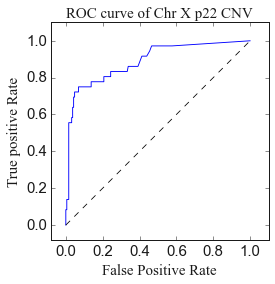

In [39]:
fig = plt.figure()
plt.style.use('classic')

ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='blue', linewidth=0.9)

plt.plot(x, y, '--', color='black', linewidth=0.8)

plt.title('ROC curve of Chr X p22 CNV', fontsize=15, fontname = 'Times New Roman')

plt.xlabel('False Positive Rate', fontsize=15, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=15, fontname = 'Times New Roman')

ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)

plt.xticks(fontsize=15, fontname = 'Arial')
plt.yticks(fontsize=15, fontname = 'Arial')

plt.savefig('ROC_Curve_Combination.png', dpi=700)
plt.show()

#### 3.10.4.1 AUC Value

In [40]:
auc_value = auc(fpr, tpr)

In [41]:
print('AUC is ', auc_value)

AUC is  0.8894767783656672


# Results

In [42]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.907


In [43]:
print(performanceReport)

               precision    recall  f1-score   support

        chr_x       0.94      0.95      0.94       189
chr_x_p22_cnv       0.71      0.69      0.70        36

    micro avg       0.91      0.91      0.91       225
    macro avg       0.83      0.82      0.82       225
 weighted avg       0.91      0.91      0.91       225



In [44]:
type(performanceReport)

str

In [45]:
print('AUC is ', auc_value)

AUC is  0.8894767783656672


## Export to a text file

In [46]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()